In [18]:
#import dependencies:
from langgraph.graph import StateGraph,START,END
from langgraph.checkpoint.memory import InMemorySaver
from typing import Annotated,TypedDict
from langchain_groq import ChatGroq
from pydantic import BaseModel
import os
from dotenv import load_dotenv
load_dotenv()



True

In [19]:
#importing the model:
model = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=1.8,
    groq_api_key=os.getenv("GROQ_API_KEY")
)
# result=llm.invoke("what is the real name of messi")
# print(result.content)


In [20]:
#creating states:
class statejoke(TypedDict):
    topic: str
    joke:str
    explanation:str
    

In [21]:
#creating generate_joke node:
def generate_joke(state:statejoke):
    prompt=f"generate me a short and sweet joke on the given topic: {state['topic']} "

    response=model.invoke(prompt).content
    return{'joke': response}

In [22]:
#creating generate_explanation of node:
def generate_explanation(state: statejoke):
    prompt=f"generate me a explanation of this joke in easy way and in short(not very long): {state['joke']}"

    response=model.invoke(prompt).content
    return{'explanation': response} 

In [23]:
graph=StateGraph(statejoke)

#adding nodes:
graph.add_node('generate_joke',generate_joke)
graph.add_node('generate_explanation',generate_explanation)

#adding edges:
graph.add_edge(START,'generate_joke')
graph.add_edge('generate_joke','generate_explanation')
graph.add_edge("generate_explanation",END)

#memory:
check_pointer=InMemorySaver()

#compiling:
workflow=graph.compile(checkpointer=check_pointer)

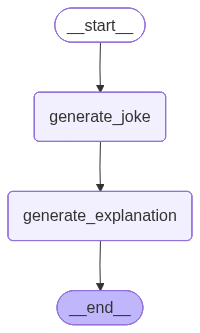

In [24]:
workflow

In [25]:
config_1={"configurable":{"thread_id":"1"}}
workflow.invoke({'topic':'railways'},config=config_1)

{'topic': 'railways',
 'joke': 'Why did the railway conductor bring a ladder on board? \n\nBecause he wanted to upgrade his train service.',
 'explanation': "Here's a simple explanation of the joke:\n\nThe joke is funny because when we think of upgrading train service, we think of adding more things like air conditioning, faster Wi-Fi, or new seats. The conductor brought a real ladder and joked about upgrading the service (by adding extra stairs) - it's an exaggeration which made it funny."}

In [26]:
workflow.get_state(config=config_1)

StateSnapshot(values={'topic': 'railways', 'joke': 'Why did the railway conductor bring a ladder on board? \n\nBecause he wanted to upgrade his train service.', 'explanation': "Here's a simple explanation of the joke:\n\nThe joke is funny because when we think of upgrading train service, we think of adding more things like air conditioning, faster Wi-Fi, or new seats. The conductor brought a real ladder and joked about upgrading the service (by adding extra stairs) - it's an exaggeration which made it funny."}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e5a0e-e4d9-6c36-8002-78f74f42d879'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-12-30T16:59:40.407668+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e5a0e-e1d1-6548-8001-df6dcb1b34f3'}}, tasks=(), interrupts=())

In [27]:
list(workflow.get_state_history(config=config_1))

[StateSnapshot(values={'topic': 'railways', 'joke': 'Why did the railway conductor bring a ladder on board? \n\nBecause he wanted to upgrade his train service.', 'explanation': "Here's a simple explanation of the joke:\n\nThe joke is funny because when we think of upgrading train service, we think of adding more things like air conditioning, faster Wi-Fi, or new seats. The conductor brought a real ladder and joked about upgrading the service (by adding extra stairs) - it's an exaggeration which made it funny."}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e5a0e-e4d9-6c36-8002-78f74f42d879'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-12-30T16:59:40.407668+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e5a0e-e1d1-6548-8001-df6dcb1b34f3'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'railways', 'joke': 'Why did the railway conductor bring a l

In [28]:
config_2={"configurable":{"thread_id":"2"}}
workflow.invoke({'topic':'airways'},config=config_2)

{'topic': 'airways',
 'joke': "Why did the airline's PA system break up with the air traffic controller? \n\nBecause it couldn't reach an understandable voice on the same frequency!",
 'explanation': 'This joke is a pun. It plays with two meanings of the word "reach".\n\nIn one sense, "reach" means to contact or be in touch with someone.\n\nIn radio communication, it also means to receive a clear audio signal on the same frequency.'}

In [29]:
workflow.get_state(config=config_2)

StateSnapshot(values={'topic': 'airways', 'joke': "Why did the airline's PA system break up with the air traffic controller? \n\nBecause it couldn't reach an understandable voice on the same frequency!", 'explanation': 'This joke is a pun. It plays with two meanings of the word "reach".\n\nIn one sense, "reach" means to contact or be in touch with someone.\n\nIn radio communication, it also means to receive a clear audio signal on the same frequency.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0e5a0e-e9b6-6d94-8002-1f172425a4aa'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-12-30T16:59:40.917684+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0e5a0e-e732-651e-8001-27459f2f5cf5'}}, tasks=(), interrupts=())

In [30]:
list(workflow.get_state_history(config=config_2))

[StateSnapshot(values={'topic': 'airways', 'joke': "Why did the airline's PA system break up with the air traffic controller? \n\nBecause it couldn't reach an understandable voice on the same frequency!", 'explanation': 'This joke is a pun. It plays with two meanings of the word "reach".\n\nIn one sense, "reach" means to contact or be in touch with someone.\n\nIn radio communication, it also means to receive a clear audio signal on the same frequency.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0e5a0e-e9b6-6d94-8002-1f172425a4aa'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-12-30T16:59:40.917684+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0e5a0e-e732-651e-8001-27459f2f5cf5'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'airways', 'joke': "Why did the airline's PA system break up with the air traffic controller? \n\nBecause it couldn't r

In [31]:
# workflow.get_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f06cc6e-7232-6cb1-8000-f71609e6cec5"}})